# Model - Image Captioning

Here I will run a model to generate captions for objects. This will be done in a few step.  
(the main structure of steps and dataset from https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/)

1. Extract feature from pretrained network for object recognition.  
2. Using the flicker dataset with labels, train CNN/RNN model 
3. Art Captioning: for this I'll try couple different method
    - test artworks on a model trained for object captioning
    - include art with description to the CNN/RNN 
    - include artworks to the CNN
    - include less concrete object images (e.g. cloud) to the CNN
    - train more abstract labeling in RNN
    
Additionally, some evaluation steps to take a look.
1. Check what type of objects are classified better or worse
2. Try semantic projection (abstract - concrete) to score the level of abstraction of each word and run statistical testing on how the model performance differs per the level of abstraction

In [88]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from tensorflow.keras.applications import NASNetLarge 
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model

import pickle

import os

import numpy as np
from timeit import default_timer as timer

In [2]:
flicker_img_dir = 'IMAGES/Flicker/Flicker8k_Dataset'
flicker_text_dir = 'IMAGES/Flicker/labels'

In [3]:
import gc

# remove unnecessary variables
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Feature Extraction
---
First, extracting features from Flicker dataset using NASNet network.

In [4]:
def feature_extractor(dir_, network):
    ''' 
    iterate through files in dir_ 
    and get features running on network
    return a dictionary with image id as a key
    '''
    model = network()
    model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
    fnames = [x for x in os.listdir(dir_) if x.endswith('.jpg')]
    result = {}
    i = 1
    n = len(fnames)
    
    for fn in fnames:
        img = load_img(f'{dir_}/{fn}', target_size = (331, 331))
        img = np.expand_dims(img, 0)
        img = preprocess_input(img)
        feature = model.predict(img)
        ind = fn.split('.')[0]
        result[ind] = feature
        print(f'{i}/{n} feature extraction completed')
        i += 1
    return result

In [5]:
features = feature_extractor(flicker_img_dir, NASNetLarge)

1/8091 feature extraction completed
2/8091 feature extraction completed
3/8091 feature extraction completed
4/8091 feature extraction completed
5/8091 feature extraction completed
6/8091 feature extraction completed
7/8091 feature extraction completed
8/8091 feature extraction completed
9/8091 feature extraction completed
10/8091 feature extraction completed
11/8091 feature extraction completed
12/8091 feature extraction completed
13/8091 feature extraction completed
14/8091 feature extraction completed
15/8091 feature extraction completed
16/8091 feature extraction completed
17/8091 feature extraction completed
18/8091 feature extraction completed
19/8091 feature extraction completed
20/8091 feature extraction completed
21/8091 feature extraction completed
22/8091 feature extraction completed
23/8091 feature extraction completed
24/8091 feature extraction completed
25/8091 feature extraction completed
26/8091 feature extraction completed
27/8091 feature extraction completed
28/8091 fe

220/8091 feature extraction completed
221/8091 feature extraction completed
222/8091 feature extraction completed
223/8091 feature extraction completed
224/8091 feature extraction completed
225/8091 feature extraction completed
226/8091 feature extraction completed
227/8091 feature extraction completed
228/8091 feature extraction completed
229/8091 feature extraction completed
230/8091 feature extraction completed
231/8091 feature extraction completed
232/8091 feature extraction completed
233/8091 feature extraction completed
234/8091 feature extraction completed
235/8091 feature extraction completed
236/8091 feature extraction completed
237/8091 feature extraction completed
238/8091 feature extraction completed
239/8091 feature extraction completed
240/8091 feature extraction completed
241/8091 feature extraction completed
242/8091 feature extraction completed
243/8091 feature extraction completed
244/8091 feature extraction completed
245/8091 feature extraction completed
246/8091 fea

436/8091 feature extraction completed
437/8091 feature extraction completed
438/8091 feature extraction completed
439/8091 feature extraction completed
440/8091 feature extraction completed
441/8091 feature extraction completed
442/8091 feature extraction completed
443/8091 feature extraction completed
444/8091 feature extraction completed
445/8091 feature extraction completed
446/8091 feature extraction completed
447/8091 feature extraction completed
448/8091 feature extraction completed
449/8091 feature extraction completed
450/8091 feature extraction completed
451/8091 feature extraction completed
452/8091 feature extraction completed
453/8091 feature extraction completed
454/8091 feature extraction completed
455/8091 feature extraction completed
456/8091 feature extraction completed
457/8091 feature extraction completed
458/8091 feature extraction completed
459/8091 feature extraction completed
460/8091 feature extraction completed
461/8091 feature extraction completed
462/8091 fea

652/8091 feature extraction completed
653/8091 feature extraction completed
654/8091 feature extraction completed
655/8091 feature extraction completed
656/8091 feature extraction completed
657/8091 feature extraction completed
658/8091 feature extraction completed
659/8091 feature extraction completed
660/8091 feature extraction completed
661/8091 feature extraction completed
662/8091 feature extraction completed
663/8091 feature extraction completed
664/8091 feature extraction completed
665/8091 feature extraction completed
666/8091 feature extraction completed
667/8091 feature extraction completed
668/8091 feature extraction completed
669/8091 feature extraction completed
670/8091 feature extraction completed
671/8091 feature extraction completed
672/8091 feature extraction completed
673/8091 feature extraction completed
674/8091 feature extraction completed
675/8091 feature extraction completed
676/8091 feature extraction completed
677/8091 feature extraction completed
678/8091 fea

868/8091 feature extraction completed
869/8091 feature extraction completed
870/8091 feature extraction completed
871/8091 feature extraction completed
872/8091 feature extraction completed
873/8091 feature extraction completed
874/8091 feature extraction completed
875/8091 feature extraction completed
876/8091 feature extraction completed
877/8091 feature extraction completed
878/8091 feature extraction completed
879/8091 feature extraction completed
880/8091 feature extraction completed
881/8091 feature extraction completed
882/8091 feature extraction completed
883/8091 feature extraction completed
884/8091 feature extraction completed
885/8091 feature extraction completed
886/8091 feature extraction completed
887/8091 feature extraction completed
888/8091 feature extraction completed
889/8091 feature extraction completed
890/8091 feature extraction completed
891/8091 feature extraction completed
892/8091 feature extraction completed
893/8091 feature extraction completed
894/8091 fea

1082/8091 feature extraction completed
1083/8091 feature extraction completed
1084/8091 feature extraction completed
1085/8091 feature extraction completed
1086/8091 feature extraction completed
1087/8091 feature extraction completed
1088/8091 feature extraction completed
1089/8091 feature extraction completed
1090/8091 feature extraction completed
1091/8091 feature extraction completed
1092/8091 feature extraction completed
1093/8091 feature extraction completed
1094/8091 feature extraction completed
1095/8091 feature extraction completed
1096/8091 feature extraction completed
1097/8091 feature extraction completed
1098/8091 feature extraction completed
1099/8091 feature extraction completed
1100/8091 feature extraction completed
1101/8091 feature extraction completed
1102/8091 feature extraction completed
1103/8091 feature extraction completed
1104/8091 feature extraction completed
1105/8091 feature extraction completed
1106/8091 feature extraction completed
1107/8091 feature extract

1293/8091 feature extraction completed
1294/8091 feature extraction completed
1295/8091 feature extraction completed
1296/8091 feature extraction completed
1297/8091 feature extraction completed
1298/8091 feature extraction completed
1299/8091 feature extraction completed
1300/8091 feature extraction completed
1301/8091 feature extraction completed
1302/8091 feature extraction completed
1303/8091 feature extraction completed
1304/8091 feature extraction completed
1305/8091 feature extraction completed
1306/8091 feature extraction completed
1307/8091 feature extraction completed
1308/8091 feature extraction completed
1309/8091 feature extraction completed
1310/8091 feature extraction completed
1311/8091 feature extraction completed
1312/8091 feature extraction completed
1313/8091 feature extraction completed
1314/8091 feature extraction completed
1315/8091 feature extraction completed
1316/8091 feature extraction completed
1317/8091 feature extraction completed
1318/8091 feature extract

1504/8091 feature extraction completed
1505/8091 feature extraction completed
1506/8091 feature extraction completed
1507/8091 feature extraction completed
1508/8091 feature extraction completed
1509/8091 feature extraction completed
1510/8091 feature extraction completed
1511/8091 feature extraction completed
1512/8091 feature extraction completed
1513/8091 feature extraction completed
1514/8091 feature extraction completed
1515/8091 feature extraction completed
1516/8091 feature extraction completed
1517/8091 feature extraction completed
1518/8091 feature extraction completed
1519/8091 feature extraction completed
1520/8091 feature extraction completed
1521/8091 feature extraction completed
1522/8091 feature extraction completed
1523/8091 feature extraction completed
1524/8091 feature extraction completed
1525/8091 feature extraction completed
1526/8091 feature extraction completed
1527/8091 feature extraction completed
1528/8091 feature extraction completed
1529/8091 feature extract

1715/8091 feature extraction completed
1716/8091 feature extraction completed
1717/8091 feature extraction completed
1718/8091 feature extraction completed
1719/8091 feature extraction completed
1720/8091 feature extraction completed
1721/8091 feature extraction completed
1722/8091 feature extraction completed
1723/8091 feature extraction completed
1724/8091 feature extraction completed
1725/8091 feature extraction completed
1726/8091 feature extraction completed
1727/8091 feature extraction completed
1728/8091 feature extraction completed
1729/8091 feature extraction completed
1730/8091 feature extraction completed
1731/8091 feature extraction completed
1732/8091 feature extraction completed
1733/8091 feature extraction completed
1734/8091 feature extraction completed
1735/8091 feature extraction completed
1736/8091 feature extraction completed
1737/8091 feature extraction completed
1738/8091 feature extraction completed
1739/8091 feature extraction completed
1740/8091 feature extract

1926/8091 feature extraction completed
1927/8091 feature extraction completed
1928/8091 feature extraction completed
1929/8091 feature extraction completed
1930/8091 feature extraction completed
1931/8091 feature extraction completed
1932/8091 feature extraction completed
1933/8091 feature extraction completed
1934/8091 feature extraction completed
1935/8091 feature extraction completed
1936/8091 feature extraction completed
1937/8091 feature extraction completed
1938/8091 feature extraction completed
1939/8091 feature extraction completed
1940/8091 feature extraction completed
1941/8091 feature extraction completed
1942/8091 feature extraction completed
1943/8091 feature extraction completed
1944/8091 feature extraction completed
1945/8091 feature extraction completed
1946/8091 feature extraction completed
1947/8091 feature extraction completed
1948/8091 feature extraction completed
1949/8091 feature extraction completed
1950/8091 feature extraction completed
1951/8091 feature extract

2137/8091 feature extraction completed
2138/8091 feature extraction completed
2139/8091 feature extraction completed
2140/8091 feature extraction completed
2141/8091 feature extraction completed
2142/8091 feature extraction completed
2143/8091 feature extraction completed
2144/8091 feature extraction completed
2145/8091 feature extraction completed
2146/8091 feature extraction completed
2147/8091 feature extraction completed
2148/8091 feature extraction completed
2149/8091 feature extraction completed
2150/8091 feature extraction completed
2151/8091 feature extraction completed
2152/8091 feature extraction completed
2153/8091 feature extraction completed
2154/8091 feature extraction completed
2155/8091 feature extraction completed
2156/8091 feature extraction completed
2157/8091 feature extraction completed
2158/8091 feature extraction completed
2159/8091 feature extraction completed
2160/8091 feature extraction completed
2161/8091 feature extraction completed
2162/8091 feature extract

2348/8091 feature extraction completed
2349/8091 feature extraction completed
2350/8091 feature extraction completed
2351/8091 feature extraction completed
2352/8091 feature extraction completed
2353/8091 feature extraction completed
2354/8091 feature extraction completed
2355/8091 feature extraction completed
2356/8091 feature extraction completed
2357/8091 feature extraction completed
2358/8091 feature extraction completed
2359/8091 feature extraction completed
2360/8091 feature extraction completed
2361/8091 feature extraction completed
2362/8091 feature extraction completed
2363/8091 feature extraction completed
2364/8091 feature extraction completed
2365/8091 feature extraction completed
2366/8091 feature extraction completed
2367/8091 feature extraction completed
2368/8091 feature extraction completed
2369/8091 feature extraction completed
2370/8091 feature extraction completed
2371/8091 feature extraction completed
2372/8091 feature extraction completed
2373/8091 feature extract

2559/8091 feature extraction completed
2560/8091 feature extraction completed
2561/8091 feature extraction completed
2562/8091 feature extraction completed
2563/8091 feature extraction completed
2564/8091 feature extraction completed
2565/8091 feature extraction completed
2566/8091 feature extraction completed
2567/8091 feature extraction completed
2568/8091 feature extraction completed
2569/8091 feature extraction completed
2570/8091 feature extraction completed
2571/8091 feature extraction completed
2572/8091 feature extraction completed
2573/8091 feature extraction completed
2574/8091 feature extraction completed
2575/8091 feature extraction completed
2576/8091 feature extraction completed
2577/8091 feature extraction completed
2578/8091 feature extraction completed
2579/8091 feature extraction completed
2580/8091 feature extraction completed
2581/8091 feature extraction completed
2582/8091 feature extraction completed
2583/8091 feature extraction completed
2584/8091 feature extract

2770/8091 feature extraction completed
2771/8091 feature extraction completed
2772/8091 feature extraction completed
2773/8091 feature extraction completed
2774/8091 feature extraction completed
2775/8091 feature extraction completed
2776/8091 feature extraction completed
2777/8091 feature extraction completed
2778/8091 feature extraction completed
2779/8091 feature extraction completed
2780/8091 feature extraction completed
2781/8091 feature extraction completed
2782/8091 feature extraction completed
2783/8091 feature extraction completed
2784/8091 feature extraction completed
2785/8091 feature extraction completed
2786/8091 feature extraction completed
2787/8091 feature extraction completed
2788/8091 feature extraction completed
2789/8091 feature extraction completed
2790/8091 feature extraction completed
2791/8091 feature extraction completed
2792/8091 feature extraction completed
2793/8091 feature extraction completed
2794/8091 feature extraction completed
2795/8091 feature extract

2981/8091 feature extraction completed
2982/8091 feature extraction completed
2983/8091 feature extraction completed
2984/8091 feature extraction completed
2985/8091 feature extraction completed
2986/8091 feature extraction completed
2987/8091 feature extraction completed
2988/8091 feature extraction completed
2989/8091 feature extraction completed
2990/8091 feature extraction completed
2991/8091 feature extraction completed
2992/8091 feature extraction completed
2993/8091 feature extraction completed
2994/8091 feature extraction completed
2995/8091 feature extraction completed
2996/8091 feature extraction completed
2997/8091 feature extraction completed
2998/8091 feature extraction completed
2999/8091 feature extraction completed
3000/8091 feature extraction completed
3001/8091 feature extraction completed
3002/8091 feature extraction completed
3003/8091 feature extraction completed
3004/8091 feature extraction completed
3005/8091 feature extraction completed
3006/8091 feature extract

3192/8091 feature extraction completed
3193/8091 feature extraction completed
3194/8091 feature extraction completed
3195/8091 feature extraction completed
3196/8091 feature extraction completed
3197/8091 feature extraction completed
3198/8091 feature extraction completed
3199/8091 feature extraction completed
3200/8091 feature extraction completed
3201/8091 feature extraction completed
3202/8091 feature extraction completed
3203/8091 feature extraction completed
3204/8091 feature extraction completed
3205/8091 feature extraction completed
3206/8091 feature extraction completed
3207/8091 feature extraction completed
3208/8091 feature extraction completed
3209/8091 feature extraction completed
3210/8091 feature extraction completed
3211/8091 feature extraction completed
3212/8091 feature extraction completed
3213/8091 feature extraction completed
3214/8091 feature extraction completed
3215/8091 feature extraction completed
3216/8091 feature extraction completed
3217/8091 feature extract

3403/8091 feature extraction completed
3404/8091 feature extraction completed
3405/8091 feature extraction completed
3406/8091 feature extraction completed
3407/8091 feature extraction completed
3408/8091 feature extraction completed
3409/8091 feature extraction completed
3410/8091 feature extraction completed
3411/8091 feature extraction completed
3412/8091 feature extraction completed
3413/8091 feature extraction completed
3414/8091 feature extraction completed
3415/8091 feature extraction completed
3416/8091 feature extraction completed
3417/8091 feature extraction completed
3418/8091 feature extraction completed
3419/8091 feature extraction completed
3420/8091 feature extraction completed
3421/8091 feature extraction completed
3422/8091 feature extraction completed
3423/8091 feature extraction completed
3424/8091 feature extraction completed
3425/8091 feature extraction completed
3426/8091 feature extraction completed
3427/8091 feature extraction completed
3428/8091 feature extract

3614/8091 feature extraction completed
3615/8091 feature extraction completed
3616/8091 feature extraction completed
3617/8091 feature extraction completed
3618/8091 feature extraction completed
3619/8091 feature extraction completed
3620/8091 feature extraction completed
3621/8091 feature extraction completed
3622/8091 feature extraction completed
3623/8091 feature extraction completed
3624/8091 feature extraction completed
3625/8091 feature extraction completed
3626/8091 feature extraction completed
3627/8091 feature extraction completed
3628/8091 feature extraction completed
3629/8091 feature extraction completed
3630/8091 feature extraction completed
3631/8091 feature extraction completed
3632/8091 feature extraction completed
3633/8091 feature extraction completed
3634/8091 feature extraction completed
3635/8091 feature extraction completed
3636/8091 feature extraction completed
3637/8091 feature extraction completed
3638/8091 feature extraction completed
3639/8091 feature extract

3825/8091 feature extraction completed
3826/8091 feature extraction completed
3827/8091 feature extraction completed
3828/8091 feature extraction completed
3829/8091 feature extraction completed
3830/8091 feature extraction completed
3831/8091 feature extraction completed
3832/8091 feature extraction completed
3833/8091 feature extraction completed
3834/8091 feature extraction completed
3835/8091 feature extraction completed
3836/8091 feature extraction completed
3837/8091 feature extraction completed
3838/8091 feature extraction completed
3839/8091 feature extraction completed
3840/8091 feature extraction completed
3841/8091 feature extraction completed
3842/8091 feature extraction completed
3843/8091 feature extraction completed
3844/8091 feature extraction completed
3845/8091 feature extraction completed
3846/8091 feature extraction completed
3847/8091 feature extraction completed
3848/8091 feature extraction completed
3849/8091 feature extraction completed
3850/8091 feature extract

4036/8091 feature extraction completed
4037/8091 feature extraction completed
4038/8091 feature extraction completed
4039/8091 feature extraction completed
4040/8091 feature extraction completed
4041/8091 feature extraction completed
4042/8091 feature extraction completed
4043/8091 feature extraction completed
4044/8091 feature extraction completed
4045/8091 feature extraction completed
4046/8091 feature extraction completed
4047/8091 feature extraction completed
4048/8091 feature extraction completed
4049/8091 feature extraction completed
4050/8091 feature extraction completed
4051/8091 feature extraction completed
4052/8091 feature extraction completed
4053/8091 feature extraction completed
4054/8091 feature extraction completed
4055/8091 feature extraction completed
4056/8091 feature extraction completed
4057/8091 feature extraction completed
4058/8091 feature extraction completed
4059/8091 feature extraction completed
4060/8091 feature extraction completed
4061/8091 feature extract

4247/8091 feature extraction completed
4248/8091 feature extraction completed
4249/8091 feature extraction completed
4250/8091 feature extraction completed
4251/8091 feature extraction completed
4252/8091 feature extraction completed
4253/8091 feature extraction completed
4254/8091 feature extraction completed
4255/8091 feature extraction completed
4256/8091 feature extraction completed
4257/8091 feature extraction completed
4258/8091 feature extraction completed
4259/8091 feature extraction completed
4260/8091 feature extraction completed
4261/8091 feature extraction completed
4262/8091 feature extraction completed
4263/8091 feature extraction completed
4264/8091 feature extraction completed
4265/8091 feature extraction completed
4266/8091 feature extraction completed
4267/8091 feature extraction completed
4268/8091 feature extraction completed
4269/8091 feature extraction completed
4270/8091 feature extraction completed
4271/8091 feature extraction completed
4272/8091 feature extract

4458/8091 feature extraction completed
4459/8091 feature extraction completed
4460/8091 feature extraction completed
4461/8091 feature extraction completed
4462/8091 feature extraction completed
4463/8091 feature extraction completed
4464/8091 feature extraction completed
4465/8091 feature extraction completed
4466/8091 feature extraction completed
4467/8091 feature extraction completed
4468/8091 feature extraction completed
4469/8091 feature extraction completed
4470/8091 feature extraction completed
4471/8091 feature extraction completed
4472/8091 feature extraction completed
4473/8091 feature extraction completed
4474/8091 feature extraction completed
4475/8091 feature extraction completed
4476/8091 feature extraction completed
4477/8091 feature extraction completed
4478/8091 feature extraction completed
4479/8091 feature extraction completed
4480/8091 feature extraction completed
4481/8091 feature extraction completed
4482/8091 feature extraction completed
4483/8091 feature extract

4669/8091 feature extraction completed
4670/8091 feature extraction completed
4671/8091 feature extraction completed
4672/8091 feature extraction completed
4673/8091 feature extraction completed
4674/8091 feature extraction completed
4675/8091 feature extraction completed
4676/8091 feature extraction completed
4677/8091 feature extraction completed
4678/8091 feature extraction completed
4679/8091 feature extraction completed
4680/8091 feature extraction completed
4681/8091 feature extraction completed
4682/8091 feature extraction completed
4683/8091 feature extraction completed
4684/8091 feature extraction completed
4685/8091 feature extraction completed
4686/8091 feature extraction completed
4687/8091 feature extraction completed
4688/8091 feature extraction completed
4689/8091 feature extraction completed
4690/8091 feature extraction completed
4691/8091 feature extraction completed
4692/8091 feature extraction completed
4693/8091 feature extraction completed
4694/8091 feature extract

4880/8091 feature extraction completed
4881/8091 feature extraction completed
4882/8091 feature extraction completed
4883/8091 feature extraction completed
4884/8091 feature extraction completed
4885/8091 feature extraction completed
4886/8091 feature extraction completed
4887/8091 feature extraction completed
4888/8091 feature extraction completed
4889/8091 feature extraction completed
4890/8091 feature extraction completed
4891/8091 feature extraction completed
4892/8091 feature extraction completed
4893/8091 feature extraction completed
4894/8091 feature extraction completed
4895/8091 feature extraction completed
4896/8091 feature extraction completed
4897/8091 feature extraction completed
4898/8091 feature extraction completed
4899/8091 feature extraction completed
4900/8091 feature extraction completed
4901/8091 feature extraction completed
4902/8091 feature extraction completed
4903/8091 feature extraction completed
4904/8091 feature extraction completed
4905/8091 feature extract

5091/8091 feature extraction completed
5092/8091 feature extraction completed
5093/8091 feature extraction completed
5094/8091 feature extraction completed
5095/8091 feature extraction completed
5096/8091 feature extraction completed
5097/8091 feature extraction completed
5098/8091 feature extraction completed
5099/8091 feature extraction completed
5100/8091 feature extraction completed
5101/8091 feature extraction completed
5102/8091 feature extraction completed
5103/8091 feature extraction completed
5104/8091 feature extraction completed
5105/8091 feature extraction completed
5106/8091 feature extraction completed
5107/8091 feature extraction completed
5108/8091 feature extraction completed
5109/8091 feature extraction completed
5110/8091 feature extraction completed
5111/8091 feature extraction completed
5112/8091 feature extraction completed
5113/8091 feature extraction completed
5114/8091 feature extraction completed
5115/8091 feature extraction completed
5116/8091 feature extract

5302/8091 feature extraction completed
5303/8091 feature extraction completed
5304/8091 feature extraction completed
5305/8091 feature extraction completed
5306/8091 feature extraction completed
5307/8091 feature extraction completed
5308/8091 feature extraction completed
5309/8091 feature extraction completed
5310/8091 feature extraction completed
5311/8091 feature extraction completed
5312/8091 feature extraction completed
5313/8091 feature extraction completed
5314/8091 feature extraction completed
5315/8091 feature extraction completed
5316/8091 feature extraction completed
5317/8091 feature extraction completed
5318/8091 feature extraction completed
5319/8091 feature extraction completed
5320/8091 feature extraction completed
5321/8091 feature extraction completed
5322/8091 feature extraction completed
5323/8091 feature extraction completed
5324/8091 feature extraction completed
5325/8091 feature extraction completed
5326/8091 feature extraction completed
5327/8091 feature extract

5513/8091 feature extraction completed
5514/8091 feature extraction completed
5515/8091 feature extraction completed
5516/8091 feature extraction completed
5517/8091 feature extraction completed
5518/8091 feature extraction completed
5519/8091 feature extraction completed
5520/8091 feature extraction completed
5521/8091 feature extraction completed
5522/8091 feature extraction completed
5523/8091 feature extraction completed
5524/8091 feature extraction completed
5525/8091 feature extraction completed
5526/8091 feature extraction completed
5527/8091 feature extraction completed
5528/8091 feature extraction completed
5529/8091 feature extraction completed
5530/8091 feature extraction completed
5531/8091 feature extraction completed
5532/8091 feature extraction completed
5533/8091 feature extraction completed
5534/8091 feature extraction completed
5535/8091 feature extraction completed
5536/8091 feature extraction completed
5537/8091 feature extraction completed
5538/8091 feature extract

5724/8091 feature extraction completed
5725/8091 feature extraction completed
5726/8091 feature extraction completed
5727/8091 feature extraction completed
5728/8091 feature extraction completed
5729/8091 feature extraction completed
5730/8091 feature extraction completed
5731/8091 feature extraction completed
5732/8091 feature extraction completed
5733/8091 feature extraction completed
5734/8091 feature extraction completed
5735/8091 feature extraction completed
5736/8091 feature extraction completed
5737/8091 feature extraction completed
5738/8091 feature extraction completed
5739/8091 feature extraction completed
5740/8091 feature extraction completed
5741/8091 feature extraction completed
5742/8091 feature extraction completed
5743/8091 feature extraction completed
5744/8091 feature extraction completed
5745/8091 feature extraction completed
5746/8091 feature extraction completed
5747/8091 feature extraction completed
5748/8091 feature extraction completed
5749/8091 feature extract

5935/8091 feature extraction completed
5936/8091 feature extraction completed
5937/8091 feature extraction completed
5938/8091 feature extraction completed
5939/8091 feature extraction completed
5940/8091 feature extraction completed
5941/8091 feature extraction completed
5942/8091 feature extraction completed
5943/8091 feature extraction completed
5944/8091 feature extraction completed
5945/8091 feature extraction completed
5946/8091 feature extraction completed
5947/8091 feature extraction completed
5948/8091 feature extraction completed
5949/8091 feature extraction completed
5950/8091 feature extraction completed
5951/8091 feature extraction completed
5952/8091 feature extraction completed
5953/8091 feature extraction completed
5954/8091 feature extraction completed
5955/8091 feature extraction completed
5956/8091 feature extraction completed
5957/8091 feature extraction completed
5958/8091 feature extraction completed
5959/8091 feature extraction completed
5960/8091 feature extract

6146/8091 feature extraction completed
6147/8091 feature extraction completed
6148/8091 feature extraction completed
6149/8091 feature extraction completed
6150/8091 feature extraction completed
6151/8091 feature extraction completed
6152/8091 feature extraction completed
6153/8091 feature extraction completed
6154/8091 feature extraction completed
6155/8091 feature extraction completed
6156/8091 feature extraction completed
6157/8091 feature extraction completed
6158/8091 feature extraction completed
6159/8091 feature extraction completed
6160/8091 feature extraction completed
6161/8091 feature extraction completed
6162/8091 feature extraction completed
6163/8091 feature extraction completed
6164/8091 feature extraction completed
6165/8091 feature extraction completed
6166/8091 feature extraction completed
6167/8091 feature extraction completed
6168/8091 feature extraction completed
6169/8091 feature extraction completed
6170/8091 feature extraction completed
6171/8091 feature extract

6357/8091 feature extraction completed
6358/8091 feature extraction completed
6359/8091 feature extraction completed
6360/8091 feature extraction completed
6361/8091 feature extraction completed
6362/8091 feature extraction completed
6363/8091 feature extraction completed
6364/8091 feature extraction completed
6365/8091 feature extraction completed
6366/8091 feature extraction completed
6367/8091 feature extraction completed
6368/8091 feature extraction completed
6369/8091 feature extraction completed
6370/8091 feature extraction completed
6371/8091 feature extraction completed
6372/8091 feature extraction completed
6373/8091 feature extraction completed
6374/8091 feature extraction completed
6375/8091 feature extraction completed
6376/8091 feature extraction completed
6377/8091 feature extraction completed
6378/8091 feature extraction completed
6379/8091 feature extraction completed
6380/8091 feature extraction completed
6381/8091 feature extraction completed
6382/8091 feature extract

6568/8091 feature extraction completed
6569/8091 feature extraction completed
6570/8091 feature extraction completed
6571/8091 feature extraction completed
6572/8091 feature extraction completed
6573/8091 feature extraction completed
6574/8091 feature extraction completed
6575/8091 feature extraction completed
6576/8091 feature extraction completed
6577/8091 feature extraction completed
6578/8091 feature extraction completed
6579/8091 feature extraction completed
6580/8091 feature extraction completed
6581/8091 feature extraction completed
6582/8091 feature extraction completed
6583/8091 feature extraction completed
6584/8091 feature extraction completed
6585/8091 feature extraction completed
6586/8091 feature extraction completed
6587/8091 feature extraction completed
6588/8091 feature extraction completed
6589/8091 feature extraction completed
6590/8091 feature extraction completed
6591/8091 feature extraction completed
6592/8091 feature extraction completed
6593/8091 feature extract

6779/8091 feature extraction completed
6780/8091 feature extraction completed
6781/8091 feature extraction completed
6782/8091 feature extraction completed
6783/8091 feature extraction completed
6784/8091 feature extraction completed
6785/8091 feature extraction completed
6786/8091 feature extraction completed
6787/8091 feature extraction completed
6788/8091 feature extraction completed
6789/8091 feature extraction completed
6790/8091 feature extraction completed
6791/8091 feature extraction completed
6792/8091 feature extraction completed
6793/8091 feature extraction completed
6794/8091 feature extraction completed
6795/8091 feature extraction completed
6796/8091 feature extraction completed
6797/8091 feature extraction completed
6798/8091 feature extraction completed
6799/8091 feature extraction completed
6800/8091 feature extraction completed
6801/8091 feature extraction completed
6802/8091 feature extraction completed
6803/8091 feature extraction completed
6804/8091 feature extract

6990/8091 feature extraction completed
6991/8091 feature extraction completed
6992/8091 feature extraction completed
6993/8091 feature extraction completed
6994/8091 feature extraction completed
6995/8091 feature extraction completed
6996/8091 feature extraction completed
6997/8091 feature extraction completed
6998/8091 feature extraction completed
6999/8091 feature extraction completed
7000/8091 feature extraction completed
7001/8091 feature extraction completed
7002/8091 feature extraction completed
7003/8091 feature extraction completed
7004/8091 feature extraction completed
7005/8091 feature extraction completed
7006/8091 feature extraction completed
7007/8091 feature extraction completed
7008/8091 feature extraction completed
7009/8091 feature extraction completed
7010/8091 feature extraction completed
7011/8091 feature extraction completed
7012/8091 feature extraction completed
7013/8091 feature extraction completed
7014/8091 feature extraction completed
7015/8091 feature extract

7201/8091 feature extraction completed
7202/8091 feature extraction completed
7203/8091 feature extraction completed
7204/8091 feature extraction completed
7205/8091 feature extraction completed
7206/8091 feature extraction completed
7207/8091 feature extraction completed
7208/8091 feature extraction completed
7209/8091 feature extraction completed
7210/8091 feature extraction completed
7211/8091 feature extraction completed
7212/8091 feature extraction completed
7213/8091 feature extraction completed
7214/8091 feature extraction completed
7215/8091 feature extraction completed
7216/8091 feature extraction completed
7217/8091 feature extraction completed
7218/8091 feature extraction completed
7219/8091 feature extraction completed
7220/8091 feature extraction completed
7221/8091 feature extraction completed
7222/8091 feature extraction completed
7223/8091 feature extraction completed
7224/8091 feature extraction completed
7225/8091 feature extraction completed
7226/8091 feature extract

7412/8091 feature extraction completed
7413/8091 feature extraction completed
7414/8091 feature extraction completed
7415/8091 feature extraction completed
7416/8091 feature extraction completed
7417/8091 feature extraction completed
7418/8091 feature extraction completed
7419/8091 feature extraction completed
7420/8091 feature extraction completed
7421/8091 feature extraction completed
7422/8091 feature extraction completed
7423/8091 feature extraction completed
7424/8091 feature extraction completed
7425/8091 feature extraction completed
7426/8091 feature extraction completed
7427/8091 feature extraction completed
7428/8091 feature extraction completed
7429/8091 feature extraction completed
7430/8091 feature extraction completed
7431/8091 feature extraction completed
7432/8091 feature extraction completed
7433/8091 feature extraction completed
7434/8091 feature extraction completed
7435/8091 feature extraction completed
7436/8091 feature extraction completed
7437/8091 feature extract

7623/8091 feature extraction completed
7624/8091 feature extraction completed
7625/8091 feature extraction completed
7626/8091 feature extraction completed
7627/8091 feature extraction completed
7628/8091 feature extraction completed
7629/8091 feature extraction completed
7630/8091 feature extraction completed
7631/8091 feature extraction completed
7632/8091 feature extraction completed
7633/8091 feature extraction completed
7634/8091 feature extraction completed
7635/8091 feature extraction completed
7636/8091 feature extraction completed
7637/8091 feature extraction completed
7638/8091 feature extraction completed
7639/8091 feature extraction completed
7640/8091 feature extraction completed
7641/8091 feature extraction completed
7642/8091 feature extraction completed
7643/8091 feature extraction completed
7644/8091 feature extraction completed
7645/8091 feature extraction completed
7646/8091 feature extraction completed
7647/8091 feature extraction completed
7648/8091 feature extract

7834/8091 feature extraction completed
7835/8091 feature extraction completed
7836/8091 feature extraction completed
7837/8091 feature extraction completed
7838/8091 feature extraction completed
7839/8091 feature extraction completed
7840/8091 feature extraction completed
7841/8091 feature extraction completed
7842/8091 feature extraction completed
7843/8091 feature extraction completed
7844/8091 feature extraction completed
7845/8091 feature extraction completed
7846/8091 feature extraction completed
7847/8091 feature extraction completed
7848/8091 feature extraction completed
7849/8091 feature extraction completed
7850/8091 feature extraction completed
7851/8091 feature extraction completed
7852/8091 feature extraction completed
7853/8091 feature extraction completed
7854/8091 feature extraction completed
7855/8091 feature extraction completed
7856/8091 feature extraction completed
7857/8091 feature extraction completed
7858/8091 feature extraction completed
7859/8091 feature extract

8045/8091 feature extraction completed
8046/8091 feature extraction completed
8047/8091 feature extraction completed
8048/8091 feature extraction completed
8049/8091 feature extraction completed
8050/8091 feature extraction completed
8051/8091 feature extraction completed
8052/8091 feature extraction completed
8053/8091 feature extraction completed
8054/8091 feature extraction completed
8055/8091 feature extraction completed
8056/8091 feature extraction completed
8057/8091 feature extraction completed
8058/8091 feature extraction completed
8059/8091 feature extraction completed
8060/8091 feature extraction completed
8061/8091 feature extraction completed
8062/8091 feature extraction completed
8063/8091 feature extraction completed
8064/8091 feature extraction completed
8065/8091 feature extraction completed
8066/8091 feature extraction completed
8067/8091 feature extraction completed
8068/8091 feature extraction completed
8069/8091 feature extraction completed
8070/8091 feature extract

In [6]:
# saving the extracted features
with open('PKL/features.pkl', 'wb') as fp:
    pickle.dump(features, fp, pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading
with open('PKL/features.pkl', 'rb') as fp:
    features = pickle.load(fp)

## Preprocessing Description
---
Now I will clean up the descriptions. 

In [ ]:
# read the description file
with open(f'{flicker_text_dir}/Flickr8k.token.txt', 'r') as fn:
    text = fn.readlines()

I'll create a dictionary with the image id as a key and the descriptions associated with that id as value.  
While I'm at it I'll also remove punctuations, make them lowercase, remove a single letter.

In [ ]:
# extract only image id and description
import re
pattern = '([0-9a-z_]*)\.jpg.*\\t(.*)\\n'
p = re.compile(pattern)
descriptions_pairs = [p.findall(x)[0] for x in text]

In [ ]:
import string

descriptions = {}

table_ = str.maketrans('', '', string.punctuation+string.digits)

for ind, text in descriptions_pairs:
    text = text.lower()
    text = str.translate(text, table_)
    text = [x for x in text.split() if len(x) > 1] # remove trailing alphabet
    text = 'seqini ' + ' '.join(text) + ' seqfin' # add tokens
    if ind in descriptions:
        descriptions[ind].append(text)
    else:
        descriptions[ind] = [text]

In [ ]:
# saving the description keys
with open('PKL/descriptions.pkl', 'wb') as fp:
    pickle.dump(descriptions, fp)

In [7]:
# loading
with open('PKL/descriptions.pkl', 'rb') as fp:
    descriptions = pickle.load(fp)

### Train/Test/Val Split
Now I'll split the list of flicker images into train/test sets then create a function that filters the dictionary of descriptions by a given list of image id.

In [44]:
from sklearn.model_selection import train_test_split
train_list, test_list = train_test_split(list(descriptions.keys()), test_size = 0.3)
val_list, test_list = train_test_split(test_list, test_size = 0.5)

## Generating Inputs
---
Now that we have our dictionaries of features and descriptions. We need to create input and output series.  
We need two separate inputs: image features, description as sequences. The output is the next word in the sequence.  

In [236]:
def get_keys(dict_):
    ''' Helper to return a list of keys '''
    return list(dict_.keys())

def get_vals(dict_):
    ''' Helper to return a list of values '''
    return list(dict_.values())
    
def get_features(features_dict, img_ind):
    if isinstance(img_ind, list):
        return [features_dict[x][0] for x in img_ind]
    elif isinstance(img_ind, str):
        return features_dict[img_ind][0]
    else:
        print('img_ind must be a list or string type')
        return None
    
def get_text(dictionary, img_ind):
    ''' RETURN: a list of description given an id '''
    return dictionary[img_ind]        
    
class sequence_generator:
    def __init__(self, dictionary, features):
        ''' INPUT: a dictionary of descriptions and features '''
        self.dictionary = dictionary
        self.features = features
        self.img_index = get_keys(self.dictionary)
        self.texts = get_vals(self.dictionary)


    
    def update_selection(self, list_):
        ''' Helper to update selector, dictionary, img, texts '''
        self.selector = list_
        self.select_dictionary = {k: v for k, v in self.dictionary.items() if (k in list_) & (k in self.features)}
        self.select_img_inds = get_keys(self.select_dictionary)
        self.select_texts = get_vals(self.select_dictionary)
    
    def sequence_process(self, dict_):
        ''' Helper to process breakdown on all select dictionary '''
        X1, X2, Y = [], [], []

        def breakdown_sequence(list_):
            ''' Helper to return a list of breakdown sequences and the output '''
            x, y = [], []
            for i in range(1, len(list_)):
                x.append(list_[:i])
                y.append(list_[i])
            return x, y
        
        for ind, texts in dict_.items():
            sequences = self.tokenizer.texts_to_sequences(texts)
            
            for seq in sequences:
                x, y = breakdown_sequence(seq)

                X1.extend(np.repeat(ind, len(y)))
                X2.extend(x)
                Y.extend(y)

        return X1, X2, Y

    def train_generator(self, train_list):
        '''
        INPUT a list of training ids, 
        RETURN image inputs, text inputs, and outputs
        ASSIGN max_length and vocab size
        '''
        self.update_selection(train_list)

        self.tokenizer = Tokenizer()
        self.tokenizer.fit_on_texts(np.concatenate(self.select_texts))
        self.num_vocab = len(self.tokenizer.word_index)+1
        
        dict_ = self.select_dictionary
        

        X1, X2, Y = self.sequence_process(dict_)
        
        X2 = pad_sequences(X2)
        self.max_length = X2.shape[1]
    
        Y = to_categorical(Y, self.num_vocab)
        X1 = get_features(self.features, X1)
        return np.array(X1), np.array(X2), np.array(Y)

    def validation_generator(self, val_list):
        '''
        INPUT a list of validation ids, 
        RETURN image inputs, text inputs and outputs
        '''
        self.update_selection(val_list)
        
        dict_ = self.select_dictionary

        X1, X2, Y = self.sequence_process(dict_)
        X2 = pad_sequences(X2, maxlen = self.max_length)
        Y = to_categorical(Y, num_classes = self.num_vocab)
        X1 = get_features(self.features, X1)

        return np.array(X1), np.array(X2), np.array(Y)
    
    def get_num_vocab(self):
        return self.num_vocab
    def get_max_length(self):
        return self.max_length
    def get_tokenizer(self):
        return self.tokenizer

In [154]:
processor = sequence_generator(descriptions, features)

In [155]:
train_X1, train_X2, train_Y = processor.train_generator(train_list)

In [156]:
val_X1, val_X2, val_Y = processor.validation_generator(val_list)

# Image Captioning Model

Finally, it't time to build the network architecture!  
The network will have two inputs, one for extracted featuers and another for texts.Text sequences will be processed through RNN.

In [98]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, add
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
max_length = processor.get_max_length()
num_vocab = processor.get_num_vocab()

In [100]:
#first path
in1 = Input(shape = (4032,))
img_layer1 = Dropout(0.5)(in1)
img_layer2 = Dense(256, activation = 'relu')(img_layer1)
# second path
in2 = Input(shape=(max_length,))
text_layer1 = Embedding(num_vocab, 256, mask_zero = True)(in2)
text_layer2 = Dropout(0.5)(text_layer1)
text_layer3 = LSTM(256)(text_layer2)
# outputting
output_layer1 = add([img_layer2, text_layer3])
output_layer2 = Dense(256, activation = 'relu')(output_layer1)
output = Dense(num_vocab, activation = 'softmax')(output_layer2)
# compile model
model = Model(inputs = [in1, in2], outputs = output)
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam')

cp = EarlyStopping(patience = 7, restore_best_weights= True)

# training
start = timer()

history = model.fit([train_X1, train_X2], train_Y, 
                    epochs=20, 
                    validation_data = ([val_X1, val_X2], val_Y),
                    workers = 6, 
                    callbacks = [cp], 
                    verbose = 1
                   )
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
9045/9045 [==============================] - 1183s 131ms/step - loss: 4.7319 - val_loss: 4.2429
Epoch 2/20
9045/9045 [==============================] - 1183s 131ms/step - loss: 4.0794 - val_loss: 4.1265
Epoch 3/20
9045/9045 [==============================] - 1145s 127ms/step - loss: 3.8383 - val_loss: 4.0860
Epoch 4/20
9045/9045 [==============================] - 1166s 129ms/step - loss: 3.7155 - val_loss: 4.0943
Epoch 5/20
9045/9045 [==============================] - 1163s 129ms/step - loss: 3.6436 - val_loss: 4.0962
Epoch 6/20
9045/9045 [==============================] - 1159s 128ms/step - loss: 3.5959 - val_loss: 4.1297
Epoch 7/20
9045/9045 [==============================] - 1152s 127ms/step - loss: 3.5668 - val_loss: 4.1685
Epoch 8/20
9045/9045 [==============================] - 1169s 129ms/step - loss: 3.5516 - val_loss: 4.1718
Epoch 9/20
9045/9045 [==============================] - 1156s 128ms/step - loss: 3.5388 - val_loss: 4.1984
Epoch 10/20
9045/9045 [==============

In [106]:
tmp_model = model.to_json()
with open("MODEL/img_c_ep10_L3-84_VL4-09.json", "w") as fn:
    fn.write(tmp_model)

model.save_weights("MODEL/img_c_ep10_L3-84_VL4-09.h5")

In [86]:
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

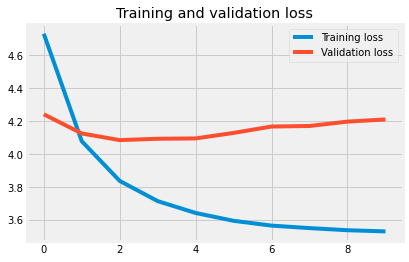

In [101]:
plot_performance(history)

Best validation loss doesn't seem too far off from training loss. Let's try to evaluate the model.

# Evaluation
I'll now predict the model performance. First, I'll get the prediction for each of the testing set. Then the prediction will be compared to the actual captions by BLEU score, which evaluates the translation quality between two texts.

In [114]:
tokenizer = processor.get_tokenizer()

In [241]:
# function to convert word ids to word
def ind2word(ind, tokenizer):
    '''Input: int, output: str'''
    return tokenizer.index_word[ind]

# function to return the prediction 
def caption_generator(img_ind, 
                      feature_dict = features, 
                      tokenizer = tokenizer, 
                      max_length = max_length):
    ''' 
    Input: image id (str), feature_dict, tokenizer, max_length(int)
    Output: a caption
    '''
    
    img_feats = get_features(feature_dict, img_ind)
    img_feats = np.expand_dims(img_feats, axis = 0)
    current_int = tokenizer.texts_to_sequences(['seqini'])
    fin_int = tokenizer.texts_to_sequences(['seqfin'])[0]
    
    # iterate each sequence and predict the next word
    for i in range(max_length):
        current_seq = pad_sequences(current_int, maxlen = max_length)
        next_int = np.argmax(model.predict([img_feats, current_seq]))
        if next_int != fin_int:
            current_int = [current_int[0] + [next_int]]
        else: break
    
    # now translate it into the word
    return ' '.join([ind2word(x, tokenizer) for x in current_seq[0] if x != 0][1:])

### Testing
Before testing on a full set, let's just take a look at one.

In [234]:
# testing
tmp_desc = caption_generator(test_list[0], features, tokenizer, max_length)
tmp_desc

'little girl in red shirt is playing with toy'

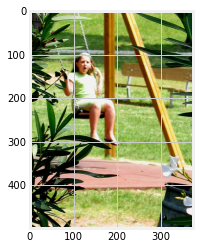

In [232]:
# display image
import matplotlib.image as mpimg
img = mpimg.imread(f'{flicker_img_dir}/{test_list[0]}.jpg')
plt.imshow(img)
plt.show()

It seems like the semantic quality of description is partially correct. But syntactically it's pretty good. Let's run it on all test images and evaluate.

### BLEU (Bilingual Evaluation Understudy Score)
BLEU score is used to evaluate the model performance in translation. It compares the prediction word to word to the set of actual descriptions and returns the value between 0 and 1. 

In [240]:
from nltk.translate.bleu_score import corpus_bleu
# http://www.nltk.org/api/nltk.translate.html

`corpus_bleu()` function from NLTK package primarily takes these arguments:
- list_of_ref: list of correct descriptions 
- hypotheses: prediction to evaluate
- weights: tuple of weights of 1-gram, 2-gram, 3-gram etc.
- smoothing_function: more info here: http://acl2014.org/acl2014/W14-33/pdf/W14-3346.pdf



In [276]:
def get_bleu(img_inds):
    prediction_list = {}
    n = len(img_inds)
    hypotheses = []
    references = []
    for i, ind in enumerate(img_inds):
        caption = caption_generator(ind)
        prediction_list[ind] = caption
        hypotheses.append(caption.split())
        
        ref = get_text(descriptions, ind)
        references.append([x.split()[1:-1] for x in ref])
        
        print(i+1, '/', n, 'complete')
    bleu_1 = corpus_bleu(references, hypotheses, weights = (1, 0, 0, 0))
    bleu_2 = corpus_bleu(references, hypotheses, weights = (.5, .5, 0, 0))
    bleu_3 = corpus_bleu(references, hypotheses, weights = (.3, .3, .3, 0))
    bleu_4 = corpus_bleu(references, hypotheses)

    print(f'1-gram BLEU: {round(bleu_1, 4)}')
    print(f'2-gram BLEU: {round(bleu_2, 4)}')
    print(f'3-gram BLEU: {round(bleu_3, 4)}')
    print(f'4-gram BLEU: {round(bleu_4, 4)}')
    return prediction_list, (bleu_1, bleu_2, bleu_3, bleu_4)

In [277]:
pred_list, score = get_bleu(test_list)

1 / 4 complete
2 / 4 complete
3 / 4 complete
4 / 4 complete
1-gram BLEU: 0.4118
2-gram BLEU: 0.2343
3-gram BLEU: 0.1575
4-gram BLEU: 0.0
